In [1]:
import pandas as pd
import numpy as np
from os import listdir
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm
from scipy.stats import sem



In [2]:
sys.path.append('C:/Users/amilas/Desktop/Python-analysis/functions')    
from my_functions import create_fig

20220727_Exp3_position1_profiles_green
20220727_Exp3_position2_profiles_green
20220727_Exp5_position1_profiles_green
20220727_Exp5_position3_profiles_green
20220727_Exp7_position1_profiles_green
20220727_Exp7_position3_profiles_green
20220728_Exp2_position1_profiles_green
20220728_Exp4_position1_profiles_green
20220728_Exp4_position3_profiles_green
20220728_Exp6_position2_profiles_green
20220729_Exp7_position1_profiles_green


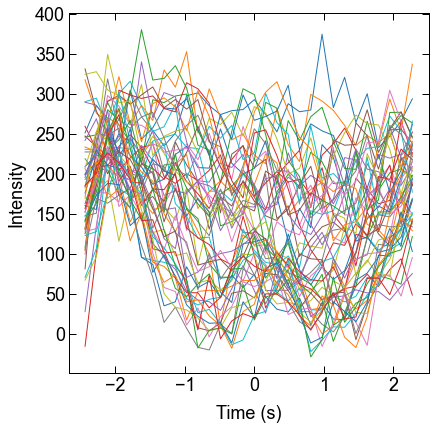

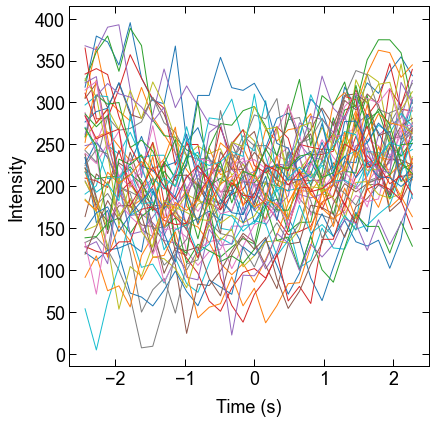

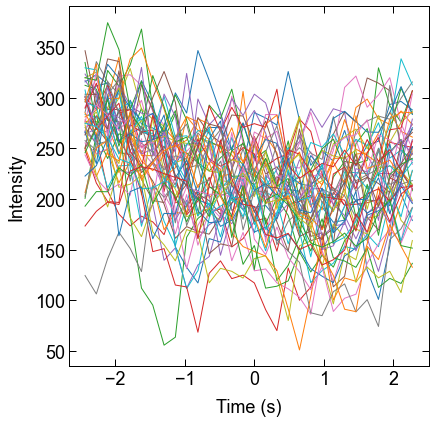

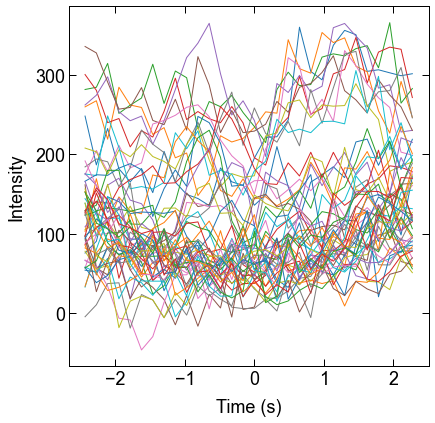

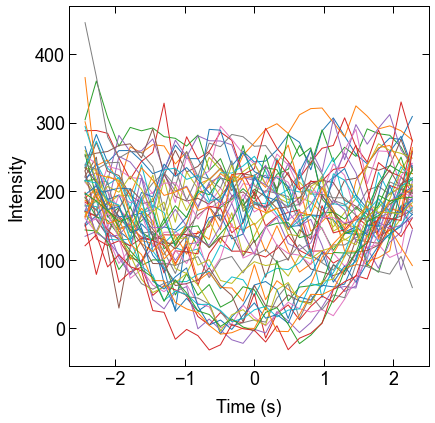

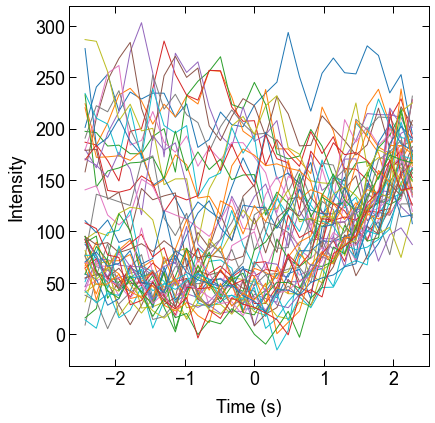

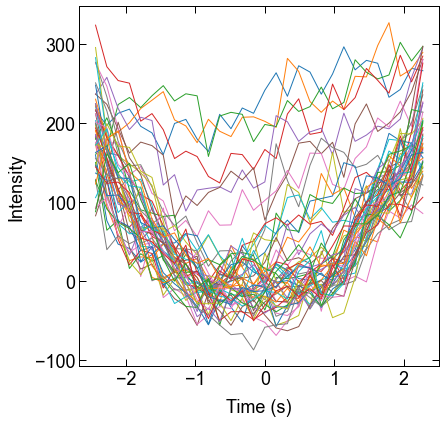

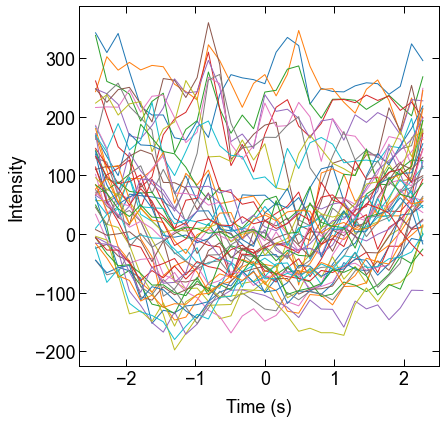

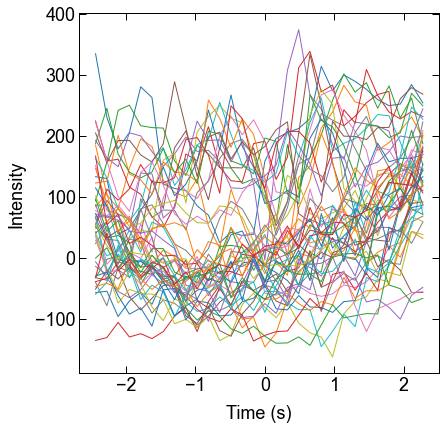

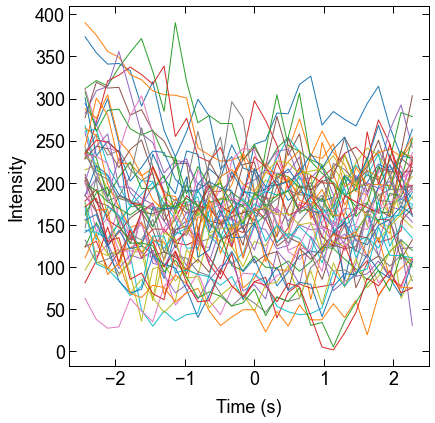

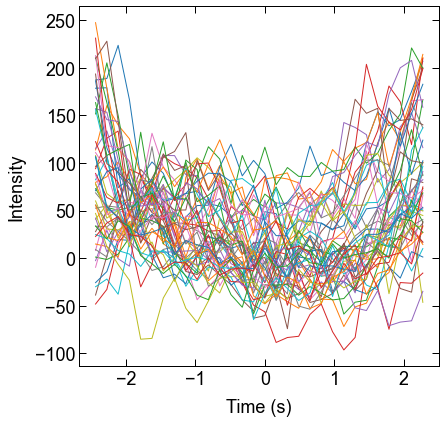

In [4]:
""" main_folder = "Bazooka_Jupiter_non_polar_PFC"
main_folder = "Bazooka_Jupiter_polar_cells"
dt=30
frames = [str(n) for n in np.arange(0, 121, 1)]
normalize_to_first=False """

""" #main_folder = "Par1_Jup_long"
main_folder = "aPKC_Baz_long"
dt=600
frames = [str(n) for n in np.arange(0, 16, 1)]
normalize_to_first=False """


""" main_folder = "Bazooka_FRAP"
dt=15
frames = [str(n) for n in np.arange(2, 89, 1)]
normalize_to_first = True 
 """



main_folder = "Par1_Baz_schneider//red"
dt=60
frames = [str(n) for n in np.arange(0, 54, 1)]
normalize_to_first = False


main_folder = "Par1_Baz_schneider_st9//green"
dt=60
frames = [str(n) for n in np.arange(0, 54, 1)]
normalize_to_first = False


folders = [name for name in os.listdir(main_folder)]
px_size = 0.1625



col_names = ["frame_"+frame for frame in frames]
all_oocytes = pd.DataFrame(columns = col_names)
for folder in folders:
    print(folder)
    norm_intensities = []
    fig, ax = create_fig()
    intensity_files = [f for f in listdir(f"{main_folder}/{folder}") if f.endswith("csv") and not "background" in f]
    txt_files = [f for f in listdir(f"{main_folder}/{folder}") if f.endswith("txt")]
    background_files = [f[:-4]+"_background.csv" for f in intensity_files]
    first_frame_intensity = pd.read_csv(f"{main_folder}/{folder}/{intensity_files[0]}").Value.mean()-pd.read_csv(f"{main_folder}/{folder}/{background_files[0]}").Value.mean()
    for name in col_names:
        intensity_file = [f for f in intensity_files if name+".csv" in f][0]
        background_file = [f for f in background_files if name+"_background.csv" in f][0]


        intensity = pd.read_csv(f"{main_folder}/{folder}/{intensity_file}").Value
        #intensity = intensity[int(len(intensity)/2)-15:int(len(intensity)/2) +15].reset_index(drop=True)
        
        
        background = pd.read_csv(f"{main_folder}/{folder}/{background_file}").Value.mean()

        norm_intensity = intensity - background
        
        num_bins = 30
        bin_size = int(len(intensity)/(num_bins))
        bin_edges = np.histogram(np.arange(0, len(intensity)), bins = num_bins)[1]

        norm_intensity_binned = [intensity[int(b):int(bin_edges[i+1])].mean() for i, b in enumerate(bin_edges[:-1])]-background
        if normalize_to_first: norm_intensity_binned = norm_intensity_binned/first_frame_intensity

        norm_intensity = norm_intensity_binned
        x_axis = (np.arange(0, len(norm_intensity))-len(norm_intensity)/2)*px_size
        #x_axis = np.arange(0, len(norm_intensity))/len(norm_intensity)
        ax.plot(x_axis, norm_intensity, linewidth=plt.rcParams['axes.linewidth'], label = intensity_file[intensity_file.index("frame"):-4])
        #ax.plot(x_axis, norm_intensity.rolling(10, center=True).median(), linewidth=plt.rcParams['axes.linewidth'], label = intensity_file[intensity_file.index("frame"):-4])
        #norm_intensities.append([norm_intensity.values])
        norm_intensities.append([norm_intensity_binned])
    #ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    int_df = pd.DataFrame(norm_intensities, columns=[intensity_file]).transpose()
    int_df.columns = col_names
    all_oocytes = pd.concat([all_oocytes, int_df])


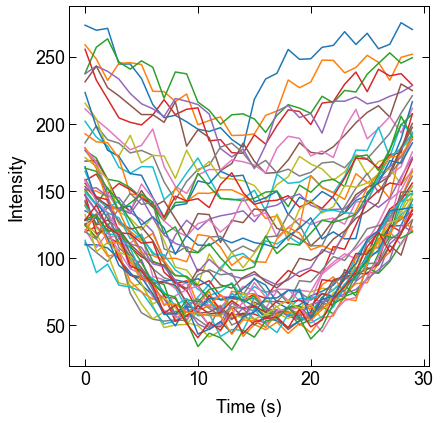

In [5]:
fig, ax = create_fig()


intensities = []
for frame, column in enumerate(all_oocytes.columns):
    new_df = pd.DataFrame(all_oocytes[column].to_list(), index = all_oocytes[column].index)#.dropna()
    ys = [new_df[c].mean() for c in new_df.columns]
    ax.plot(ys, label = column)
    
    intensities.append(ys)


#ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

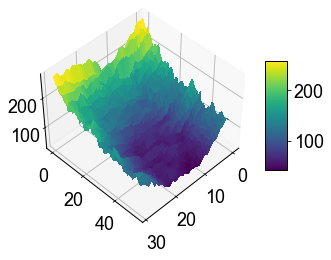

In [6]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, len(intensities[0]))
Y = np.arange(0, len(intensities))
X, Y = np.meshgrid(X, Y)
Z = np.array(intensities)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
#ax.view_init(90, 90)

plt.show()


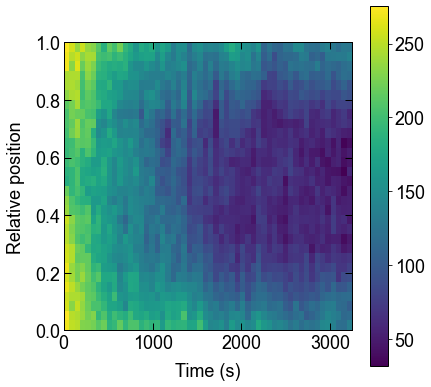

In [7]:
COLOR="black"
plot_size = "big"
fig, ax = create_fig(COLOR=COLOR, plot_size=plot_size, ylabel="Relative position")
#ax.get_yticks(size=0)
plt.imshow(np.transpose(intensities), cmap=cm.viridis, aspect=len(intensities*dt), interpolation=None, extent=[0,len(intensities)*dt, 0, 1])
plt.colorbar(shrink=1)
#plt.xticks(np.arange(0, 10000, step=4000))
plt.show()

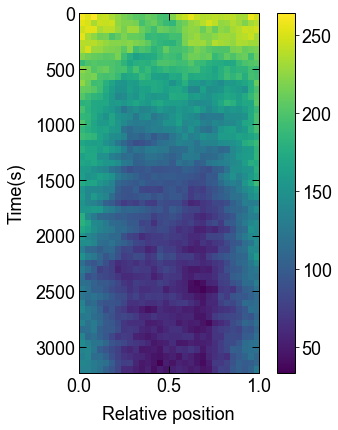

In [244]:

##FRAP plot

COLOR="black"
plot_size = "big"
fig, ax = create_fig(COLOR=COLOR, plot_size=plot_size, ylabel="Time(s)", xlabel="Relative position")
#ax.get_yticks(size=0)
plt.imshow((intensities), cmap=cm.viridis, aspect=2/len(intensities*dt), interpolation=None, extent=[0,1, len(intensities)*dt, 0])
plt.colorbar(shrink=1)
#plt.xticks(np.arange(0, 10000, step=4000))
plt.show()

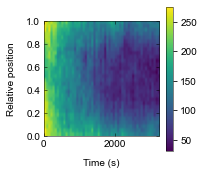

In [9]:
COLOR="black"
plot_size = "small"
fig, ax = create_fig(COLOR=COLOR, plot_size=plot_size, ylabel="Relative position")
#ax.get_yticks(size=0)
plt.imshow(np.transpose(intensities), cmap=cm.viridis, aspect=len(intensities*dt), interpolation=None, extent=[0,len(intensities)*dt, 0, 1])
plt.colorbar(shrink=1)
#plt.xticks(np.arange(0, 10000, step=4000))
#plt.title("Bazooka")

In [10]:
#main_folder = "Par1_Baz_schneider_Bazooka"
fig.savefig(f'{main_folder}_{COLOR}_{plot_size}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{main_folder}_{COLOR}_{plot_size}.png', dpi=300, transparent=True, bbox_inches='tight')